# Riddler Express
From Shaun Raviv, a tall tale on the basketball court:

You’re hanging out with some friends, shooting the breeze and talking sports. One of them brags to the group that he once made 17 free throws in a row after years of not having touched a basketball. You think the claim sounds unlikely, but plausible. Another friend scoffs, thinking it completely impossible. Let’s give your bragging friend the benefit of the doubt and say he’s a 70-percent free-throw shooter.

So, who’s right? What is the number of free throws that a 70-percent shooter would be expected to take before having a streak of 17 makes in a row? And what if his accuracy was a bit worse?

In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
import itertools
from multiprocessing import Pool
import matplotlib.colors as colors

In [2]:
CONSECUTIVE_SHOTS = 17
MAKE_CHANCE = 0.7

In [3]:
def calculate_shots(consecutive_makes, make_chance):

    T = np.zeros((consecutive_makes + 1,consecutive_makes + 1))
    T[:-1,0] = 1 - make_chance
    T[-1,-1] = 1
    rng = np.arange(consecutive_makes)
    T[rng, rng+1] = make_chance

    q = np.mat(T[:-1,:-1])
    i = np.identity(q.shape[0])
    n = np.linalg.inv(i - q)
    
    return np.array(n * np.ones((n.shape[1],1)))[0][0]

In [4]:
calculate_shots(CONSECUTIVE_SHOTS, MAKE_CHANCE)

1429.5540709031739

In [5]:
def simulate_shots(consecutive_makes, make_chance):
    consec_shots = 0
    total_shots = 0
    
    while consec_shots < consecutive_makes:
        if random.random() < make_chance:
            consec_shots += 1
        else:
            consec_shots = 0
        total_shots += 1
    
    return total_shots

In [6]:
N = 10000
results = [simulate_shots(CONSECUTIVE_SHOTS, MAKE_CHANCE) for _ in range(N)]

In [7]:
np.mean(results)

1438.9706000000001

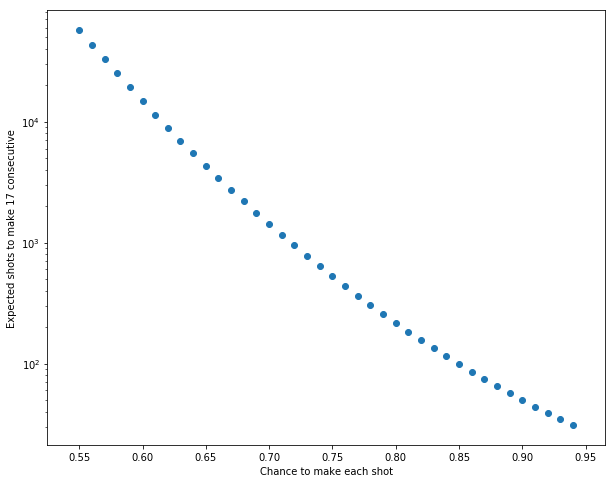

In [16]:
make_chances = np.arange(0.55,0.95,0.01)
expects = [calculate_shots(CONSECUTIVE_SHOTS, chance) for chance in make_chances]

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(make_chances, expects)
ax.set_ylabel(f'Expected shots to make {CONSECUTIVE_SHOTS} consecutive')
ax.set_xlabel('Chance to make each shot')
ax.set_yscale('log')
plt.show()

On average, 1430 shots should be expected to make 17 consecutive shots with a 70% chance to make each.